# Baseline Model with XGBoost

In [1]:
import pandas as pd

load_forecasts_df = pd.read_hdf(r'C:\Users\Linds\Repos\East_River\data\training\east_river_processed_dataset-v1.h5')

In [2]:
load_forecasts_df.head()

,datetime,temperature,wind_speed,wind_degree,humidity,visibility,pressure,cloudcover,windgust,uv_index,...,wind_dir_S,wind_dir_SE,wind_dir_SSE,wind_dir_SSW,wind_dir_SW,wind_dir_W,wind_dir_WNW,wind_dir_WSW,weather_event_normal,weather_event_storm
6304,2021-01-01 00:00:00+00:00,19.0,6.0,184.0,91.0,6.0,30.120,16.0,14.0,1.0,...,True,False,False,False,False,False,False,False,True,False
6595,2021-01-01 00:30:00+00:00,18.5,6.0,186.0,91.0,6.0,30.135,13.5,14.0,1.0,...,True,False,False,False,False,False,False,False,True,False
6730,2021-01-01 01:00:00+00:00,18.0,6.0,188.0,91.0,6.0,30.150,11.0,14.0,1.0,...,True,False,False,False,False,False,False,False,True,False
6797,2021-01-01 01:30:00+00:00,18.0,6.0,190.0,91.0,6.0,30.150,9.0,13.0,1.0,...,True,False,False,False,False,False,False,False,True,False
6971,2021-01-01 02:00:00+00:00,18.0,6.0,192.0,91.0,6.0,30.150,7.0,12.0,1.0,...,False,False,False,True,False,False,False,False,True,False


In [3]:
print(load_forecasts_df.columns.to_list())

['datetime', 'temperature', 'wind_speed', 'wind_degree', 'humidity', 'visibility', 'pressure', 'cloudcover', 'windgust', 'uv_index', 'snowfall', 'snow_depth', 'relative_humidity_2m', 'global_tilted_irradiance', 'diffuse_radiation', 'pressure_msl', 'surface_pressure', 'blended_precip', 'OnLine_Load_MW', 'Load_Control_MW', 'Control_Threshold_MW', 'local_time', 'is_weekend', 'is_holiday', 'hour', 'minute', 'day', 'month', 'year', 'hour_sin', 'hour_cos', 'day_of_week_num', 'load_lag_3_rolling_std_3', 'load_lag_3_rolling_std_6', 'load_lag_3_rolling_std_12', 'load_diff_1', 'load_diff_24hr', 'load_lag_3_rolling_std_24hrs', 'last_control_time', 'time_since_control_minutes', 'peak_diff', 'time_since_peak_minutes', 'precip_sum_6hrs', 'day_of_year_sin', 'day_of_year_cos', 'prev_day_peak', 'prev_day_avg', 'prev_week_peak', 'temp_humidity_interaction', 'wind_precip_interaction', 'was_controlled', 'load_lag_1_rolling_mean_6hrs', 'load_lag_1_rolling_std_6hrs', 'load_lag_1_rolling_std_24hrs', 'day_of_

In [4]:
load_forecasts_df.drop('local_time', axis=1, inplace=True)

In [5]:
print("Number of features:", load_forecasts_df.shape[1])

Number of features: 119


In [25]:
import dask.dataframe as dd

# Create a Dask DataFrame from the existing pandas DataFrame in multiple partitions
dask_df = dd.from_pandas(load_forecasts_df, npartitions=10)

# Sort by 'datetime' by setting it as the index using disk-based shuffling to reduce memory usage
sorted_dask_df = dask_df.set_index('datetime', sorted=False, shuffle='disk')

# Instead of computing the full sorted DataFrame which may lead to a MemoryError,
# we compute only the head of the sorted Dask DataFrame to inspect its content.
print(sorted_dask_df.head())

MemoryError: Unable to allocate 3.79 GiB for an array with shape (42, 12101700) and data type float64

In [6]:
import matplotlib.pyplot as plt

C:\Users\Linds\AppData\Local\Temp\ipykernel_15596\562590228.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


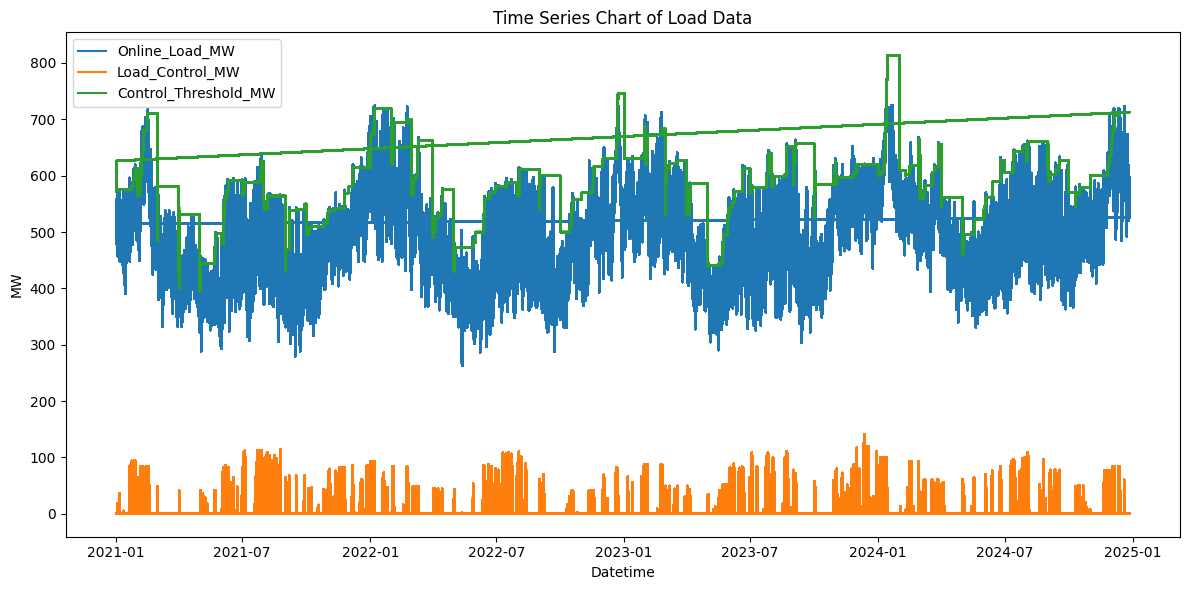

In [7]:


plt.figure(figsize=(12,6))
plt.plot(load_forecasts_df['datetime'], load_forecasts_df['OnLine_Load_MW'], label='Online_Load_MW')
plt.plot(load_forecasts_df['datetime'], load_forecasts_df['Load_Control_MW'], label='Load_Control_MW')
plt.plot(load_forecasts_df['datetime'], load_forecasts_df['Control_Threshold_MW'], label='Control_Threshold_MW')
plt.xlabel('Datetime')
plt.ylabel('MW')
plt.title('Time Series Chart of Load Data')
plt.legend()
plt.tight_layout()
plt.show()